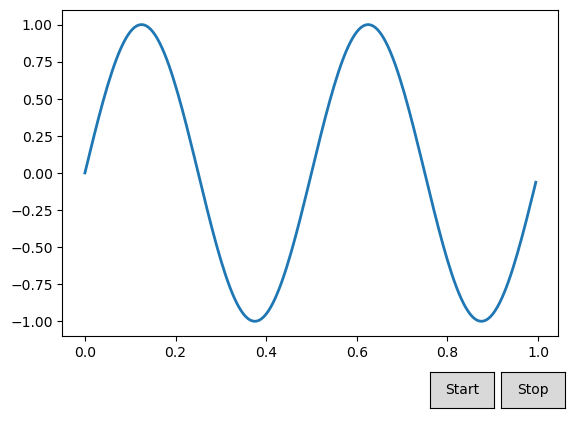

In [1]:
from time import sleep
from threading import Thread
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

fig, ax = plt.subplots()
#设置图形显示位置
plt.subplots_adjust(bottom=0.2)
#实验数据
range_start, range_end, range_step = 0, 1, 0.005
t = np.arange(range_start, range_end, range_step)
s = np.sin(4*np.pi*t)
l, = plt.plot(t, s, lw=2)
#自定义类，用来封装两个按钮的单击事件处理函数
class ButtonHandler:
    def __init__(self):
        self.flag = True
        self.range_s, self.range_e, self.range_step = 0, 1, 0.005
    #线程函数，用来更新数据并重新绘制图形
    def threadStart(self):
        while self.flag:
            sleep(0.02)
            self.range_s += self.range_step
            self.range_e += self.range_step
            t = np.arange(self.range_s, self.range_e, self.range_step)
            ydata = np.sin(4*np.pi*t)
            #更新数据
            l.set_xdata(t-t[0])
            l.set_ydata(ydata)
            #重新绘制图形
            plt.draw()
    def Start(self, event):
        self.flag = True
        #创建并启动新线程
        t = Thread(target=self.threadStart)
        t.start()
    def Stop(self, event):
        self.flag = False
        
callback = ButtonHandler()
#创建按钮并设置单击事件处理函数
axprev = plt.axes([0.81, 0.05, 0.1, 0.075])
bprev = Button(axprev, 'Stop')
bprev.on_clicked(callback.Stop)
axnext = plt.axes([0.7, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Start')
bnext.on_clicked(callback.Start)

plt.show()


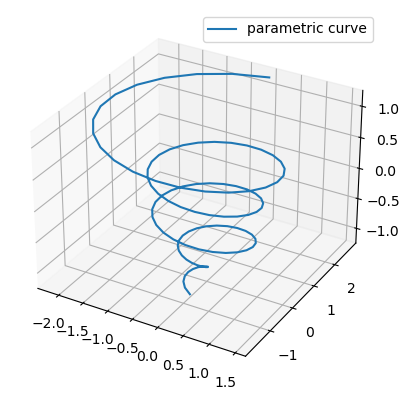

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

# fig = plt.figure()
# ax = fig.gca(projection='3d')
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-4, 4, 100)*0.3
r = z**3 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


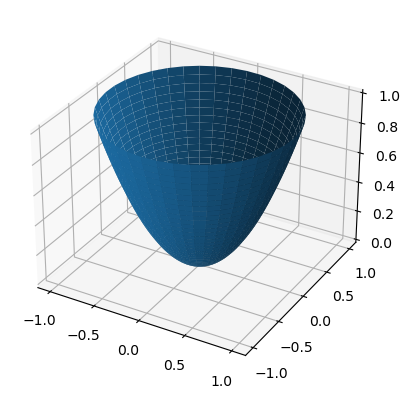

In [3]:
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
rho, theta = np.mgrid[0:1:40j, 0:2*np.pi:40j]
z = rho**2
x = rho*np.cos(theta)
y = rho*np.sin(theta)
ax = pl.subplot(111, projection='3d')
ax.plot_surface(x,y,z)
pl.show()


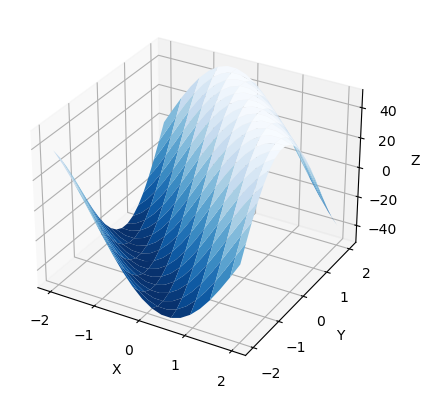

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
x,y = np.mgrid[-2:2:20j, -2:2:20j]
z = 50 * np.sin(x+y)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x,y,z,rstride=2, cstride=1, cmap=plt.cm.Blues_r)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


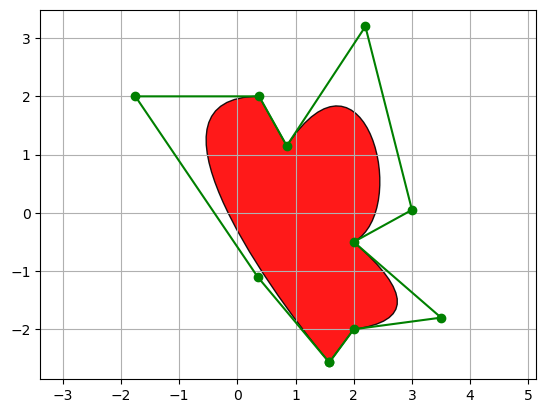

In [5]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

#定义绘图指令与控制点坐标
#其中MOVETO表示将绘制起点移动到指定坐标
#CURVE4表示使用4个控制点绘制3次贝塞尔曲线
#CURVE3表示使用3个控制点绘制2次贝塞尔曲线
#LINETO表示从当前位置绘制直线到指定位置
#CLOSEPOLY表示从当前位置绘制直线到指定位置，并闭合多边形
path_data = [
           (Path.MOVETO, (1.58, -2.57)),
           (Path.CURVE4, (0.35, -1.1)),
           (Path.CURVE4, (-1.75, 2.0)),
           (Path.CURVE4, (0.375, 2.0)),
           (Path.LINETO, (0.85, 1.15)),
           (Path.CURVE4, (2.2, 3.2)),
           (Path.CURVE4, (3, 0.05)),
           (Path.CURVE4, (2.0, -0.5)),
           (Path.CURVE3, (3.5, -1.8)),
           (Path.CURVE3, (2, -2)),
           (Path.CLOSEPOLY, (1.58, -2.57)),
          ]
codes, verts = zip(*path_data)
path = Path(verts, codes)
#按指令和坐标进行绘图
patch = PathPatch(path, facecolor='r', alpha=0.9)
ax.add_patch(patch)

# 绘制控制多边形和连接点
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

#显示网格
ax.grid()
#设置坐标轴刻度大小一致，可以更真实地显示图形
ax.axis('equal')
plt.show()


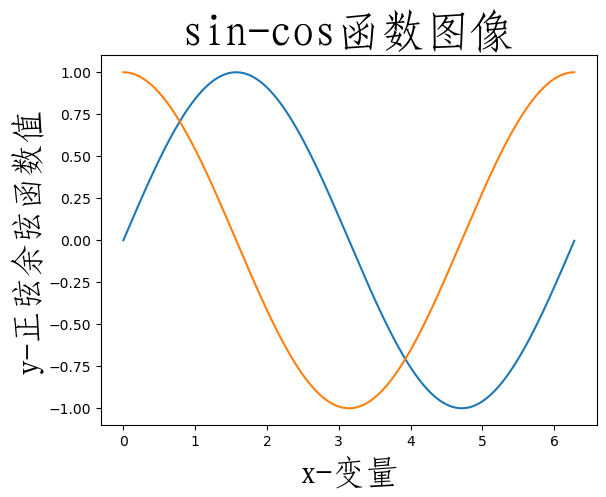

In [8]:
import numpy as np
import pylab as pl
import matplotlib.font_manager as fm

# myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\STKAITI.ttf')

t = np.arange(0.0, 2.0*np.pi, 0.01)
s = np.sin(t)
z = np.cos(t)
pl.plot(t, s, label='正弦')
pl.plot(t, z, label='余弦')
pl.xlabel('x-变量', fontproperties='FangSong_GB2312', fontsize=24)
pl.ylabel('y-正弦余弦函数值', fontproperties='FangSong_GB2312', fontsize=24)
pl.title('sin-cos函数图像', fontproperties='FangSong_GB2312', fontsize=32)
# pl.legend(prop=myfont)
pl.show()


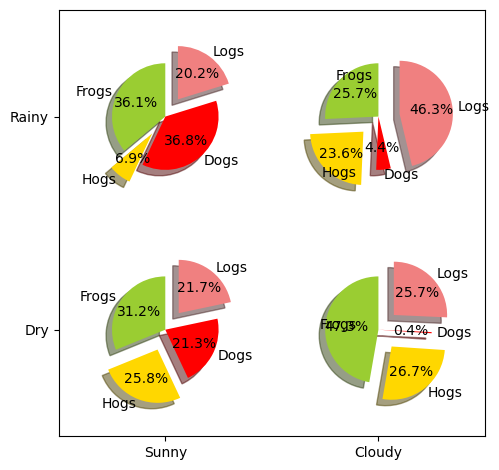

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', '#FF0000', 'lightcoral']
explode = (0, 0.1, 0, 0.1)  # only "explode" the 2nd and fourth slice

fig = plt.figure()
ax = fig.gca()

ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 0), frame=True)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Sunny", "Cloudy"])
ax.set_yticklabels(["Dry", "Rainy"])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import scipy.signal as signal
x = np.arange(0,6,0.1)
y = np.sin(x)
z = y.copy()
print ('='*20)
print ('y:')
print (y)
print ('='*20)
print ('before adding noise.z-y:')
print (z-y)
index = np.random.randint(0,len(x),20)
noise = np.random.standard_normal(20)*0.8
z[index]+=noise
print ('='*20)
print ('after adding noise.z-y:')
print (z-y)
result = signal.medfilt(z,3)
print ('='*20)
print ('after median filtering.z-y:')
print (result-y)


y:
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666]
before adding noise.z-y:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
after adding noise.z-y:
[ 0.40611105 -0.58881937  0.     

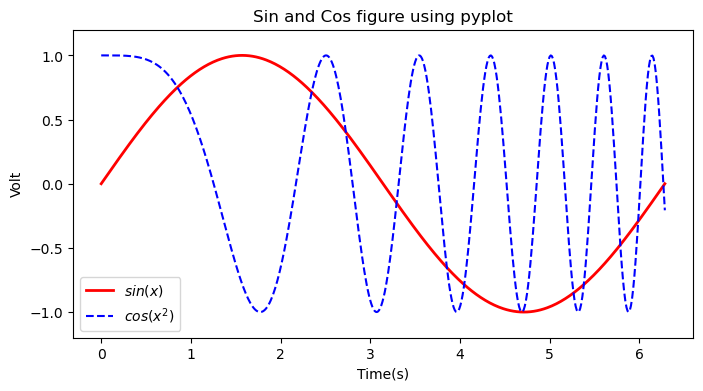

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x)
z = np.cos(x*x)
plt.figure(figsize=(8,4))
plt.plot(x,y,label='$sin(x)$',color='red',linewidth=2)
plt.plot(x,z,'b--',label='$cos(x^2)$')
plt.xlabel('Time(s)')
plt.ylabel('Volt')
plt.title('Sin and Cos figure using pyplot')
plt.ylim(-1.2,1.2)
plt.legend()
plt.savefig('sin_cos.png',dpi=120)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


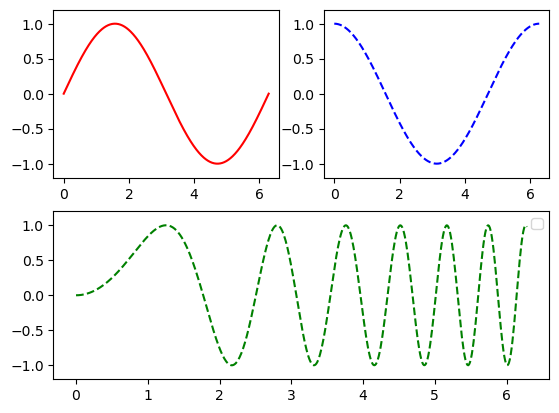

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 500)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x*x)
#create figure
plt.figure(1)
#create three axes
#first line,first column
ax1 = plt.subplot(2,2,1)
#first line,second column
ax2 = plt.subplot(2,2,2)
#the whole second line
ax3 = plt.subplot(2,1,2)
#choose ax1
plt.sca(ax1)
#draw the curve in ax1
plt.plot(x,y1,color='red')
plt.ylim(-1.2,1.2)
#choose ax2
plt.sca(ax2)
plt.plot(x,y2,'b--')
plt.ylim(-1.2,1.2)
#choose ax3
plt.sca(ax3)
plt.plot(x,y3,'g--')
plt.ylim(-1.2,1.2)

plt.legend()
plt.show()
